# Определение перспективного тарифа для телеком-компании

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна». 

Компанией предложено два тарифа: 
- Тариф "Смарт"
- Тариф "Ультра"

**Цель исследования** - проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Ход исследования**

- На первом этапе мы откроем предложенные датасеты и познакомимся с общей информацией;
- Подготовим данные: приведем данные к нужным типам, исправим найденые ошибки; также посчитаем дополнительные показатели, которые понадабятся нам в дальнейшей работе;
- Проанализируем данные;
- Проверим гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
- Напишем общий вывод.

## Обзор данных 

Импортируем библиотеку pandas.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

Прочитайте файлs формата .csv из папки /datasets и сохраним их в переменный `calls`, `internet`, `messages`, `tariffs`, `users`.

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Выведем на экран первые 5 строк таблиц, а также посмотрим общую информацию.

In [3]:
display(calls.head(10))
display(calls.info())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

В таблице `calls` четыре столбца. Два столбца имеют тип данных — `object`, один столбец тип данных - `float`, еще один тип данных - `int` 

In [4]:
display(internet.head(10))
display(internet.info())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

Построим гистограмму распределения объема интернет-сессий

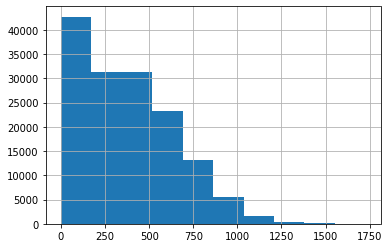

In [5]:
internet['mb_used'].hist();

На наибольшее количество интернет-сессий затрачено менее 250 мегабайт и далее наблюдается уменьшение числа сессий с увеличением объема интернет трафика. Здесь аномалий не наблюдается, данные выглядят правдоподобно.

В таблице `internet` пять столбцов. Два столбца имеют тип данных — `object`, еще два столбца тип данных - `int`, оставшийся столбец тип данных - `float` 

In [7]:
display(messages.head(10))
display(messages.info())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

В таблице `messages` три столбца. Два столбца имеют тип данных — `object`, еще один тип данных - `int` 

In [8]:
display(tariffs.head(10))
display(tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

В таблице `tariffs` восемь столбцов. Семь столбцов имеют тип данных — `int`, еще один тип данных - `object` 

In [9]:
display(users.head(10))
display(users.info())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

В таблице `users` восемь столбцов. Шесть столбцов имеют тип данных — `object`, еще два тип данных - `int` 

Согласно документации к данным:

Таблица `calls` (информация о звонках):
- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

Таблица `internet` (информация об интернет-сессиях):
- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

Таблица `messages` (информация о сообщениях):
- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

Таблица `tariffs` (информация о тарифах):
- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Таблица `users` (информация о пользователях):
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

**Выводы**

В четырех таблицах — данные о деятельности определенного пользователя. В таблице `tariffs` - представлена информация о двух тарифах. 

Предварительно можно утверждать, что необходимо произвести ряд дополнительных расчетов для проверки гипотез. Также встречаются ошибки в данных, некоторые данные нужно привести к более корретному типу.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Приведение данных к нужным типам

Приведем данные колонок, в которых указана дата к типу `datetime`

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M')

### Поиск дубликатов

Проверим таблицу `users` на наличие дубликатов. Совпадение данных в этой таблице, может свидетельствовать о дублирующихся данных. В остальных таблицах данные могут совпадать.

In [12]:
users = users.drop_duplicates() 

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 35.2+ KB


В таблице нет дубликатов.

### Количественные значения

In [14]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [15]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [16]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Мы проверили данные, которые могли бы принимать аномальные значения, данные в выбраных колонках имеют правдоподобные значения.

### Подсчет количественных значений

- Найдём количество сделанных звонков и использованных минут каждым пользователем по месяцам.

На первом этапе, определим в каком месяце был совершен звонок.

In [17]:
calls['month'] = calls['call_date'].dt.month 
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


Далее посчитаем количество звонков и общее количество использованных минут отдельным пользователем в каждый месяц 

In [18]:
def correct_duration(row):
    """
    Возвращает корректное значение потраченых минту:
    - определяет количество исходящих минту
    - Если длительность больше 0, то округляем в большую сторону
    """
    duration = row['duration']
        
    correct_duration = np.ceil(duration)
         
    return correct_duration

In [19]:
calls['correct_duration'] = calls.apply(correct_duration, axis=1)
calls

,id,call_date,duration,user_id,month,correct_duration
0,1000_0,2018-07-25,0.00,1000,7,0.0
1,1000_1,2018-08-17,0.00,1000,8,0.0
2,1000_2,2018-06-11,2.85,1000,6,3.0
3,1000_3,2018-09-21,13.80,1000,9,14.0
4,1000_4,2018-12-15,5.18,1000,12,6.0
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12,1.0
202603,1499_216,2018-10-18,18.83,1499,10,19.0
202604,1499_217,2018-11-10,10.81,1499,11,11.0
202605,1499_218,2018-10-06,4.27,1499,10,5.0


In [20]:
calls_total = calls.pivot_table(index=['user_id', 'month'], values=['correct_duration'], aggfunc=['sum', 'count'])
calls_total.columns = ['calls_duration', 'calls_count']
calls_total

calls_duration  calls_count
user_id month                             
1000    5               159.0           22
        6               172.0           43
        7               340.0           47
        8               408.0           52
        9               466.0           58
...                       ...          ...
1498    10              247.0           41
1499    9                70.0            9
        10              449.0           68
        11              612.0           74
        12              492.0           69

[3174 rows x 2 columns]

- Далее аналогичным образом подсчитаем количество сообщение отправленных каждым пользователем по месяцам.

In [21]:
messages['month'] = messages['message_date'].dt.month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [22]:
messages_total = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
messages_total.columns = ['messages_count']
messages_total

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

- Посчитаем общее количество интернет трафика, использованного каждым пользователем в месяц

In [23]:
internet['month'] = internet['session_date'].dt.month
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


In [24]:
internet_total = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet_total.columns = ['mb_used_sum']
internet_total

mb_used_sum
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91
...                    ...
1498    10        20579.36
1499    9          1845.75
        10        17788.51
        11        17963.31
        12        13055.58

[3203 rows x 1 columns]

- Соединим полученные данные в одну таблицу

In [25]:
internet_total = internet_total.merge(calls_total, how="outer", on=['user_id', 'month']).merge(messages_total, how="outer", 
                                                                                               on=['user_id', 'month'])

Переименуем таблицу и изменим индексацию

In [26]:
df_total = internet_total.reset_index()
df_total

,user_id,month,mb_used_sum,calls_duration,calls_count,messages_count
0,1000,5,2253.49,159.0,22.0,22.0
1,1000,6,23233.77,172.0,43.0,60.0
2,1000,7,14003.64,340.0,47.0,75.0
3,1000,8,14055.93,408.0,52.0,81.0
4,1000,9,14568.91,466.0,58.0,57.0
...,...,...,...,...,...,...
3209,1273,11,NaN,272.0,45.0,29.0
3210,1273,12,NaN,260.0,41.0,39.0
3211,1377,2,NaN,179.0,23.0,2.0
3212,1392,2,NaN,13.0,2.0,3.0


Добавим колонку, указывающую на тариф каждого пользователя

In [27]:
df_tariffs = users[['user_id', 'tariff']]
df_total = df_total.merge(df_tariffs, how="outer", on='user_id')
df_total

,user_id,month,mb_used_sum,calls_duration,calls_count,messages_count,tariff
0,1000,5.0,2253.49,159.0,22.0,22.0,ultra
1,1000,6.0,23233.77,172.0,43.0,60.0,ultra
2,1000,7.0,14003.64,340.0,47.0,75.0,ultra
3,1000,8.0,14055.93,408.0,52.0,81.0,ultra
4,1000,9.0,14568.91,466.0,58.0,57.0,ultra
...,...,...,...,...,...,...,...
3211,1273,10.0,NaN,315.0,40.0,35.0,ultra
3212,1273,11.0,NaN,272.0,45.0,29.0,ultra
3213,1273,12.0,NaN,260.0,41.0,39.0,ultra
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra


Данные месяца критически важны для анализа, поэтому колонки, в которых данные о месяце отсутствуют, мы удалим.

Пропуски свидетельствуют о том, что данной услугой клиент не пользовался. Зполним пропуски

In [29]:
df_total = df_total.dropna(subset=['month'])

In [30]:
df_total.loc[:, 'mb_used_sum'] = df_total.loc[:, 'mb_used_sum'].fillna(0)
df_total.loc[:, 'calls_duration'] = df_total.loc[:, 'calls_duration'].fillna(0)
df_total.loc[:, 'calls_count'] = df_total.loc[:, 'calls_count'].fillna(0)
df_total.loc[:, 'messages_count'] = df_total.loc[:, 'messages_count'].fillna(0)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [31]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   float64
 2   mb_used_sum     3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   calls_count     3214 non-null   float64
 5   messages_count  3214 non-null   float64
 6   tariff          3214 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 200.9+ KB


Подсчитаем затраты каждого пользователя в месяц. Для этого создадим функцию `tariff`

In [32]:
def tariff(row):
    """
    Возвращает общее количество потраченых пользователем денег:
    - Определяет какой тариф использует клиент
    - Подсчитывает количество дополнительно затраченых услуг
    - Суммирует плату за дополнительные услуги и базовую стоимость тарифа.
    """
    tariff = row['tariff']
    mb_used_sum = row['mb_used_sum']
    messages_count = row['messages_count']
    calls_duration = row['calls_duration']
    
    if tariff == 'ultra':
        messages_overrun = messages_count - tariffs.loc[1, 'messages_included'] 
        if messages_overrun > 0:
            revenue_by_messages =  messages_overrun * tariffs.loc[1, 'rub_per_message']
        else:
            revenue_by_messages = 0
        mb_overrun = mb_used_sum - tariffs.loc[1, 'mb_per_month_included']
        if mb_overrun > 0:
            if mb_overrun % 1024 != 0:
                revenue_mb = (int(mb_overrun / 1024) + 1) * tariffs.loc[1, 'rub_per_gb']
            else:
                revenue_mb = int(mb_overrun / 1024) * tariffs.loc[1, 'rub_per_gb']
        else: 
            revenue_mb = 0
        calls_overrun = calls_duration - tariffs.loc[1, 'minutes_included']
        if calls_overrun > 0:
             revenue_calls = calls_overrun * tariffs.loc[1, 'rub_per_minute']
        else:
             revenue_calls = 0
        total_price = tariffs.loc[1, 'rub_monthly_fee'] + revenue_by_messages + revenue_mb + revenue_calls
    if tariff == 'smart':
        messages_overrun = messages_count - tariffs.loc[0, 'messages_included']
        if messages_overrun > 0:
            revenue_by_messages =  messages_overrun * tariffs.loc[0, 'rub_per_message']
        else:
            revenue_by_messages = 0
        mb_overrun = mb_used_sum - tariffs.loc[0, 'mb_per_month_included']
        if mb_overrun > 0:
            if mb_overrun % 1024 != 0:
                revenue_mb = (int(mb_overrun / 1024) + 1) * tariffs.loc[0, 'rub_per_gb']
            else:
                revenue_mb = int(mb_overrun / 1024) * tariffs.loc[0, 'rub_per_gb']
        else: 
            revenue_mb = 0
        calls_overrun = calls_duration - tariffs.loc[0, 'minutes_included']
        if calls_overrun > 0:
             revenue_calls = calls_overrun * tariffs.loc[0, 'rub_per_minute']
        else:
             revenue_calls = 0
        total_price = tariffs.loc[0, 'rub_monthly_fee'] + revenue_by_messages + revenue_mb + revenue_calls
     
    return total_price

In [35]:
df_total['total_price'] = df_total.apply(tariff, axis=1)
df_total

,index,user_id,month,mb_used_sum,calls_duration,calls_count,messages_count,tariff,total_price
0,0,1000,5.0,2253.49,159.0,22.0,22.0,ultra,1950.0
1,1,1000,6.0,23233.77,172.0,43.0,60.0,ultra,1950.0
2,2,1000,7.0,14003.64,340.0,47.0,75.0,ultra,1950.0
3,3,1000,8.0,14055.93,408.0,52.0,81.0,ultra,1950.0
4,4,1000,9.0,14568.91,466.0,58.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3209,3209,1273,8.0,0.00,253.0,53.0,41.0,ultra,1950.0
3210,3210,1273,9.0,0.00,223.0,33.0,32.0,ultra,1950.0
3211,3211,1273,10.0,0.00,315.0,40.0,35.0,ultra,1950.0
3212,3212,1273,11.0,0.00,272.0,45.0,29.0,ultra,1950.0


## Анализ данных

Посчитаем среднее количество, дисперсию и стандартное отклонение показателей датасета

In [38]:
df_total_mean = df_total.pivot_table(index=['tariff', 'month'], 
                                      values=['mb_used_sum', 'calls_duration', 'messages_count', 'total_price'], 
                                      aggfunc=['mean']).round(2)
df_total_mean

mean                                       
             calls_duration mb_used_sum messages_count total_price
tariff month                                                      
smart  1.0           203.85     8513.72          18.24      721.32
       2.0           298.69    11597.05          24.09      827.60
       3.0           390.05    15104.16          31.86     1164.62
       4.0           367.13    13462.18          30.74      963.09
       5.0           387.36    15805.18          33.77     1197.51
       6.0           395.64    15794.65          33.40     1204.02
       7.0           408.35    15743.15          33.75     1223.95
       8.0           421.47    16610.72          33.64     1320.60
       9.0           428.61    16303.58          33.64     1249.95
       10.0          426.14    16757.12          33.77     1364.85
       11.0          435.27    16895.70          34.08     1343.05
       12.0          478.56    18113.66          35.99     1578.53
ultra  1.0           428.11    13140.68          33.78     1950.00
       2.0           297.12    11775.94          21.96     1975.00
       3.0           489.65    17535.55          32.30     2014.86
       4.0           458.02    16828.13          31.56     2001.82
       5.0           510.33    19363.15          37.85     2059.70
       6.0           479.70    18924.94          41.73     2039.29
       7.0           545.79    20495.67          49.85     2118.13
       8.0           510.78    19576.05          48.44     2083.18
       9.0           539.44    19204.28          52.29     2024.35
       10.0          558.08    20045.34          58.43     2065.85
       11.0          541.38    19786.81          55.79     2092.16
       12.0          592.81    21793.17          60.61     2138.85

In [39]:
df_total_var = df_total.pivot_table(index=['tariff', 'month'], 
                                      values=['mb_used_sum', 'calls_duration', 'messages_count', 'total_price'], 
                                      aggfunc=['var']).round(1)
df_total_var

var                                        
             calls_duration  mb_used_sum messages_count total_price
tariff month                                                       
smart  1.0          23787.3   41533913.4          262.4    192516.2
       2.0          36412.3   39029429.9          473.1    292358.7
       3.0          36823.2   33968352.8          718.5    487239.0
       4.0          34778.2   32470042.7          602.1    315916.6
       5.0          34820.1   35739254.6          731.0    522690.2
       6.0          30742.9   33537483.0          806.8    556125.2
       7.0          32250.3   34776430.6          799.9    545338.2
       8.0          34793.6   31287232.5          838.3    627619.4
       9.0          33535.3   26999618.9          790.6    536688.5
       10.0         35392.3   34332386.6          816.1    710266.4
       11.0         31605.2   28518520.2          805.9    633185.8
       12.0         39698.6   31065938.5          935.0   1070678.5
ultra  1.0          72769.4   47132987.7          940.7         0.0
       2.0          87919.7  113308444.0          716.8      7173.9
       3.0         111384.9  119941614.1         1732.4     43175.7
       4.0          71653.9   94452154.8         1407.3     38515.2
       5.0          83870.2  100924330.4         1624.6    162669.6
       6.0          91535.9   86357572.1         1986.3     99823.6
       7.0          94322.3  101308192.0         2372.0    198917.6
       8.0          97956.5  109758234.2         2171.7    159761.5
       9.0         105716.8   89985870.9         2152.9     60937.1
       10.0        106464.6   96100999.9         2697.2    149685.1
       11.0         96570.1   98158937.7         2476.9    167588.5
       12.0        117276.3  107710907.3         2682.0    232610.3

In [40]:
df_total_std = df_total.pivot_table(index=['tariff', 'month'], 
                                      values=['mb_used_sum', 'calls_duration', 'messages_count', 'total_price'], 
                                      aggfunc=['std']).round(1)
df_total_std

std                                       
             calls_duration mb_used_sum messages_count total_price
tariff month                                                      
smart  1.0            154.2      6444.7           16.2       438.8
       2.0            190.8      6247.4           21.8       540.7
       3.0            191.9      5828.2           26.8       698.0
       4.0            186.5      5698.2           24.5       562.1
       5.0            186.6      5978.2           27.0       723.0
       6.0            175.3      5791.2           28.4       745.7
       7.0            179.6      5897.2           28.3       738.5
       8.0            186.5      5593.5           29.0       792.2
       9.0            183.1      5196.1           28.1       732.6
       10.0           188.1      5859.4           28.6       842.8
       11.0           177.8      5340.3           28.4       795.7
       12.0           199.2      5573.7           30.6      1034.7
ultra  1.0            269.8      6865.3           30.7         0.0
       2.0            296.5     10644.6           26.8        84.7
       3.0            333.7     10951.8           41.6       207.8
       4.0            267.7      9718.6           37.5       196.3
       5.0            289.6     10046.1           40.3       403.3
       6.0            302.5      9292.9           44.6       315.9
       7.0            307.1     10065.2           48.7       446.0
       8.0            313.0     10476.6           46.6       399.7
       9.0            325.1      9486.1           46.4       246.9
       10.0           326.3      9803.1           51.9       386.9
       11.0           310.8      9907.5           49.8       409.4
       12.0           342.5     10378.4           51.8       482.3

Среднее расстояние между ценой заплаченой пользователями тарифа `smart` выше, что свидетельствует о частой покупке клиентами дополнительных услуг.

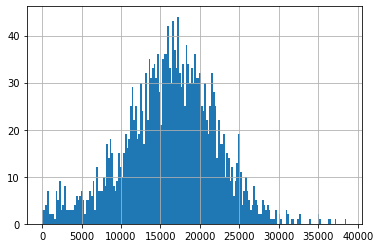

In [41]:
df_total[df_total.tariff == 'smart']['mb_used_sum'].hist(bins = 180);

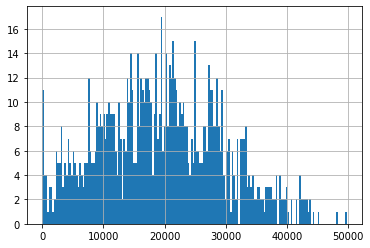

In [42]:
df_total[df_total.tariff == 'ultra']['mb_used_sum'].hist(bins = 180);

Рассмотрев траты интернет-трафика пользователями разных тарифных планов, можно сказать, что пользователи тарифа `smart` в среднем используют максимальное количество предоставляемого тарифом значения или покупают дополнительные гигабайты. Пользователи тарифа `ultra` в среднем используют больше гигабайт, но не превышают предоставленое количество интернет-трафика, показатели среднего имеют большее отклонение. При этом у пользователей имеется высокое значение интерне-сессий со значением затраченых гигабайт равных 0, возможно речь идет о прерванных интерне-соединениях.

Рассмотрим продолжительность звонков пользователями

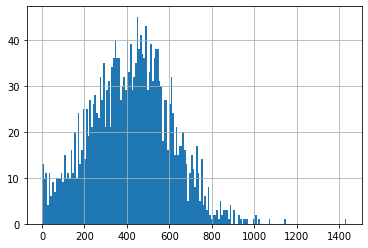

In [43]:
df_total[df_total.tariff == 'smart']['calls_duration'].hist(bins = 180);

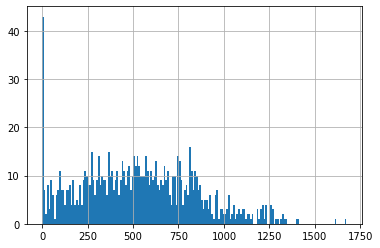

In [44]:
df_total[df_total.tariff == 'ultra']['calls_duration'].hist(bins = 180);

Пользователи обоих тарифов в среднем не испытывают нужды в дополнительных минутах. Клиенты, использующие тариф `ultra` разговаривают по телефону чаще.

Рассмотрим количество отправленных СМС пользователями

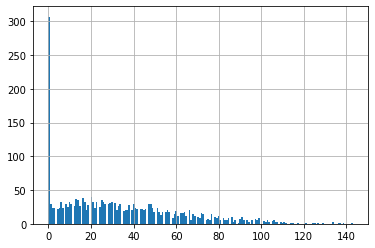

In [45]:
df_total[df_total.tariff == 'smart']['messages_count'].hist(bins = 180);

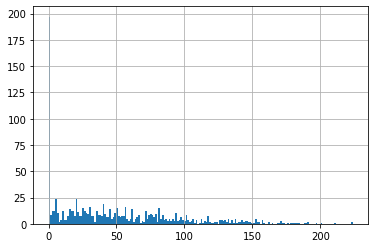

In [46]:
df_total[df_total.tariff == 'ultra']['messages_count'].hist(bins = 180);

Анализируя количество использованных СМС можно сказать, что они не пользуются особым спросом. В среднем пользователи тарифа `smart` используют меньшее количество СМС.

Рассмотрим траты пользователей на связь

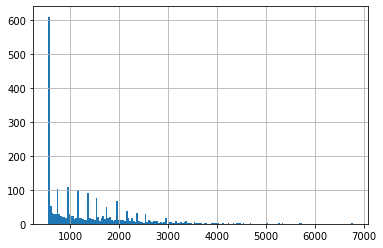

In [47]:
df_total[df_total.tariff == 'smart']['total_price'].hist(bins = 180);

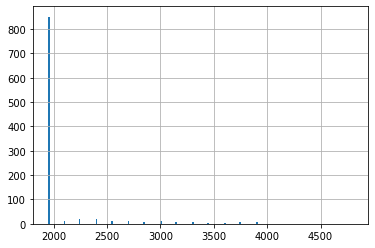

In [48]:
df_total[df_total.tariff == 'ultra']['total_price'].hist(bins = 180);

Пользователи тарифа `smart` тратят меньше пользователей тарифа `ultra`, не смотря на то, что часто им приходится докупать дополнительные пакеты услуг. Клиенты, использующие `ultra` чаще не докупают дополнительные пакеты услуг, но тем не менее платят за связь больше.

Посмотрим на количество пользователей тарифа в разбивке по месяцам

In [50]:
df_total.groupby(['month', 'tariff']).aggregate({'user_id': 'sum'})

user_id
month tariff         
1.0   smart     43100
      ultra     11658
2.0   smart     74292
      ultra     31035
3.0   smart     96773
      ultra     47322
4.0   smart    139655
      ultra     69743
5.0   smart    174737
      ultra     84265
6.0   smart    202197
      ultra    105590
7.0   smart    248318
      ultra    114965
8.0   smart    293309
      ultra    135133
9.0   smart    325487
      ultra    144969
10.0  smart    367519
      ultra    154477
11.0  smart    393901
      ultra    169276
12.0  smart    419175
      ultra    175715

По обоим тарифам наблюдается прирост

## Проверка гипотез

Найдем количество денег, которое затрачивает пользователь кажджого тарифа

In [51]:
total_price_smart = df_total.loc[df_total.loc[:,'tariff'] == 'smart']['total_price']
total_price_ultra = df_total.loc[df_total.loc[:,'tariff'] == 'ultra']['total_price']

- Проверим двустороннюю гипотезу о равенстве средних трат одного пользователя тарифа `ultra` и пользователя тарифа `smart`

H₀ - среднии затраты пользователя тарифа `smart` и пользователя тарифа `ultra` равны

H₁ - среднии затраты пользователя тарифа `smart` и пользователя тарифа `ultra` не равны

In [52]:
alpha = .05 # критический уровень статистической значимости           

results = st.ttest_ind(
    total_price_smart, 
    total_price_ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


p-value - это вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что нулевая гипотеза верна. Можно сразу понять, отвергать двустороннюю гипотезу или нет, сравнив это значение с выбранным уровнем значимости.

Данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Значит, можно сделать вывод, что средние затраты пользователя тарифа `smart` и пользователя тарифа `ultra` не равны

------------------------------------------

Создадим DataFrame с данными пользователей из Москвы

In [53]:
users_msk = users.loc[users.loc[:,'city'] == 'Москва'][['user_id', 'city', 'tariff']]
users_msk

,user_id,city,tariff
1,1001,Москва,smart
3,1003,Москва,ultra
7,1007,Москва,smart
31,1031,Москва,smart
33,1033,Москва,smart
...,...,...,...
453,1453,Москва,ultra
461,1461,Москва,ultra
476,1476,Москва,ultra
481,1481,Москва,smart


In [54]:
users_msk = users_msk.merge(df_total, on='user_id')
users_msk

,user_id,city,tariff_x,index,month,mb_used_sum,calls_duration,calls_count,messages_count,tariff_y,total_price
0,1001,Москва,smart,8,11.0,18429.34,430.0,59.0,0.0,smart,1150.0
1,1001,Москва,smart,9,12.0,14036.66,414.0,63.0,0.0,smart,550.0
2,1003,Москва,ultra,17,8.0,8565.21,380.0,55.0,37.0,ultra,1950.0
3,1003,Москва,ultra,18,9.0,12468.87,961.0,134.0,91.0,ultra,1950.0
4,1003,Москва,ultra,19,10.0,14768.14,855.0,108.0,83.0,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
606,1490,Москва,smart,3150,8.0,17275.37,346.0,45.0,50.0,smart,950.0
607,1490,Москва,smart,3151,9.0,14816.95,322.0,44.0,48.0,smart,550.0
608,1490,Москва,smart,3152,10.0,20664.97,312.0,42.0,45.0,smart,1750.0
609,1490,Москва,smart,3153,11.0,18712.66,282.0,38.0,47.0,smart,1350.0


Найдем количество денег, которое затрачивают жители Москвы

In [55]:
total_price_msk = users_msk.loc[:,'total_price'] 

Создадим DataFrame с данными пользователей, которые не являются жителями Москвы

In [56]:
users_city = users.loc[users.loc[:,'city'] != 'Москва'][['user_id', 'city', 'tariff']]
users_city

,user_id,city,tariff
0,1000,Краснодар,ultra
2,1002,Стерлитамак,smart
4,1004,Новокузнецк,ultra
5,1005,Набережные Челны,smart
6,1006,Ульяновск,smart
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [57]:
users_city = users_city.merge(df_total, on='user_id')
users_city

,user_id,city,tariff_x,index,month,mb_used_sum,calls_duration,calls_count,messages_count,tariff_y,total_price
0,1000,Краснодар,ultra,0,5.0,2253.49,159.0,22.0,22.0,ultra,1950.0
1,1000,Краснодар,ultra,1,6.0,23233.77,172.0,43.0,60.0,ultra,1950.0
2,1000,Краснодар,ultra,2,7.0,14003.64,340.0,47.0,75.0,ultra,1950.0
3,1000,Краснодар,ultra,3,8.0,14055.93,408.0,52.0,81.0,ultra,1950.0
4,1000,Краснодар,ultra,4,9.0,14568.91,466.0,58.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
2598,1498,Владикавказ,smart,3201,10.0,20579.36,247.0,41.0,42.0,smart,1750.0
2599,1499,Пермь,smart,3202,9.0,1845.75,70.0,9.0,11.0,smart,550.0
2600,1499,Пермь,smart,3203,10.0,17788.51,449.0,68.0,48.0,smart,1150.0
2601,1499,Пермь,smart,3204,11.0,17963.31,612.0,74.0,59.0,smart,1513.0


Найдем количество денег, которое затрачивают жители других городов

In [58]:
total_price_city = users_city.loc[:,'total_price'] 

- Проверим двустороннюю гипотезу об отличии средней выручки пользователей из Москвы от выручки пользователей из других регионов

H₀ - среднии затраты пользователя из Москвы и пользователя другого региона равны

H₁ - среднии затраты пользователя из Москвы и пользователя другого региона не равны

In [59]:
alpha = .05 # критический уровень статистической значимости           

results = st.ttest_ind(
    total_price_msk, 
    total_price_city)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 55%, хотя средние чеки клиентов разных городов и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.

По имеющимся данным нельзя говорить об отличие средних трат жителей Москвы и средних трат жителей других регионов

## Вывод

На первом этапе мы познакомились с общей информацией;

Далее подготовили данные: привели данные к нужным типам, также посчитаем дополнительные показатели:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.


Проанализируем данные:
- Выяснили, что в среднем клиенты тарифа `smart` тратят меньше средст, чем клиенты тарифа `ultra`

Проверим гипотезы: 
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Можно сказать, что среднии затраты пользователя тарифа `smart` и пользователя тарифа `ultra` не равны.

По имеющимся данным нельзя говорить об отличие средних трат жителей Москвы и средних трат жителей других регионов.

Проанализировав данные о полученой выручке, можно сказать, что тариф `smart` за 2018 год принес больше денег (2 876 869 Р.), чем тариф `ultra` (2 039 100 р.)

Оба тарифа показывают значительный рост клиентской базы. За 2018 год количество пользователей тарифа `smart` выросло в 9.73 раза, количество пользователей тарифа `ultra` вырослов в 15.07 раз. При этом Сумма выручки за год по тарифу `smart` увеличилась  в 21.7 раз, по тарифу `ultra` в 16.94 раза. Среди пользователей из Москвы в декабре наблюдается отток клиентов, использующих тариф `ultra` (39057, в ноябре 40424), при этом прирост пользователей тарифа `smart` сохраняется.

На основе вышеизложенных данных можно сказать, что тариф `smart` лучше.